# EDA - 2. Diagnostico de calidad de los Datos


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

**Lectura de Datos**

El input de este paso es el output del anterior

    

In [9]:
accidentes = pd.read_csv("accidentes.1.procesado_inicial.csv")
accidentes.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Outerbelt E,R,Dublin,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,I-70 E,R,Dayton,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,False,False,Night,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,I-77 N,R,Akron,...,False,False,False,False,False,False,False,False,Night,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,False,False,Day,Day


In [10]:
accidentes.shape

(2845342, 35)

# Eliminar Duplicados

In [11]:
duplicados = accidentes[accidentes.duplicated()]
print("number of duplicate rows: ", duplicados.shape)
duplicados

number of duplicate rows:  (0, 35)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight


In [12]:
accidentes.count() 

ID                   2845342
Severity             2845342
Start_Time           2845342
End_Time             2845342
Start_Lat            2845342
Start_Lng            2845342
Distance(mi)         2845342
Street               2845340
Side                 2845342
City                 2845205
County               2845342
State                2845342
Temperature(F)       2776068
Wind_Chill(F)        2375699
Humidity(%)          2772250
Pressure(in)         2786142
Visibility(mi)       2774796
Wind_Speed(mph)      2687398
Precipitation(in)    2295884
Weather_Condition    2774706
Amenity              2845342
Bump                 2845342
Crossing             2845342
Give_Way             2845342
Junction             2845342
No_Exit              2845342
Railway              2845342
Roundabout           2845342
Station              2845342
Stop                 2845342
Traffic_Calming      2845342
Traffic_Signal       2845342
Turning_Loop         2845342
Sunrise_Sunset       2842475
Civil_Twilight

In [13]:
accidentes[accidentes.duplicated()]. head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight


Al no tener filas con valores repetidos, no dropeamos ningun registro

**Records Repetidos**

Buscamos si hay variables en las que haya una gran cantidad de records que tengan el mismo valor (cardinalidad).

In [14]:
n_records = len(accidentes)

def valores_duplicados(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} || {} - {} || {}".format(
            df[columna].name, 
            round(mas_comun /(1.0*n_records),3),
            round(menos_comun/(1.0*n_records),3), df[columna].dtype))
        
valores_duplicados(accidentes)

ID || 0.0 - 0.0 || object
Severity || 0.89 - 0.009 || int64
Start_Time || 0.0 - 0.0 || object
End_Time || 0.0 - 0.0 || object
Start_Lat || 0.0 - 0.0 || float64
Start_Lng || 0.0 - 0.0 || float64
Distance(mi) || 0.135 - 0.0 || float64
Street || 0.014 - 0.0 || object
Side || 0.827 - 0.0 || object
City || 0.038 - 0.0 || object
County || 0.082 - 0.0 || object
State || 0.28 - 0.0 || object
Temperature(F) || 0.023 - 0.0 || float64
Wind_Chill(F) || 0.02 - 0.0 || float64
Humidity(%) || 0.036 - 0.0 || float64
Pressure(in) || 0.015 - 0.0 || float64
Visibility(mi) || 0.784 - 0.0 || float64
Wind_Speed(mph) || 0.152 - 0.0 || float64
Precipitation(in) || 0.74 - 0.0 || float64
Weather_Condition || 0.389 - 0.0 || object
Amenity || 0.99 - 0.01 || bool
Bump || 1.0 - 0.0 || bool
Crossing || 0.93 - 0.07 || bool
Give_Way || 0.998 - 0.002 || bool
Junction || 0.898 - 0.102 || bool
No_Exit || 0.998 - 0.002 || bool
Railway || 0.992 - 0.008 || bool
Roundabout || 1.0 - 0.0 || bool
Station || 0.976 - 0.024 || bool

Podemos observar que hay varias columnas en las que podria haber un problema con valores repetidos. Hay un alto porcentaje de valores repetidos en las columnas que tiene tipo de dato BOOL. Realizamos un analisis para ver el problema de la repetición de valores. Columnas Analisdas:

1. Side
2. Visibility
3. Precipitation
4. Crossing 

In [15]:
accidentes["Side"].value_counts(normalize = True)

R    8.270742e-01
L    1.729254e-01
N    3.514516e-07
Name: Side, dtype: float64

In [16]:
accidentes["Precipitation(in)"].value_counts(normalize = True)

0.00    9.165280e-01
0.01    2.359004e-02
0.02    1.154109e-02
0.03    7.746907e-03
0.04    5.986801e-03
            ...     
2.32    4.355621e-07
3.09    4.355621e-07
2.75    4.355621e-07
1.50    4.355621e-07
1.73    4.355621e-07
Name: Precipitation(in), Length: 230, dtype: float64

In [17]:
accidentes.Crossing .value_counts(normalize = True)

False    0.929635
True     0.070365
Name: Crossing, dtype: float64

**Conclusión valores repetidos**

Hay una alto porcentaje de valores repetidos, en especial en los valores booleanos, porque los valores posibles son TRUE o FALSE. En el caso de los tipo de dato FLOAT, los que mas se repiten son Visibility y Precipitation. El ID de los datos no se repite

# Valores Nulos


<AxesSubplot:>

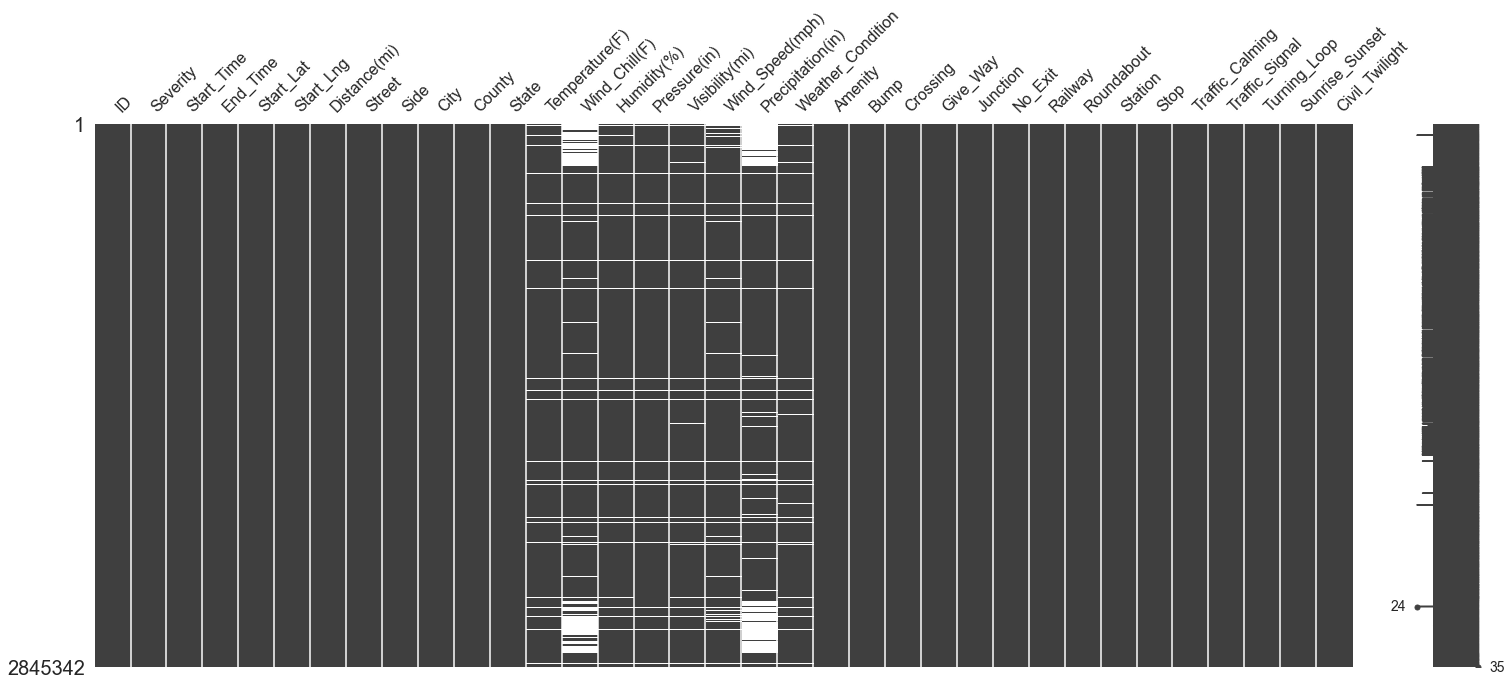

In [18]:
import missingno as msno
msno.matrix(accidentes)


La función matrix de Missingno permite ver de una forma visual dónde se encuentran los valores nulos en un conjunto de datos.

In [19]:
print(accidentes.isnull().sum())

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Street                    2
Side                      0
City                    137
County                    0
State                     0
Temperature(F)        69274
Wind_Chill(F)        469643
Humidity(%)           73092
Pressure(in)          59200
Visibility(mi)        70546
Wind_Speed(mph)      157944
Precipitation(in)    549458
Weather_Condition     70636
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset         2867
Civil_Twilight         2867
dtype: int64


In [20]:
n_records = len(accidentes)
def valores_inexistentes(df):
    for columna in df:
          print("{} || {} || {}".format(
            df[columna].name, 
            len(df[df[columna].isnull()])/(1.0*n_records), df[columna].dtype))
            
valores_inexistentes(accidentes)
    

ID || 0.0 || object
Severity || 0.0 || int64
Start_Time || 0.0 || object
End_Time || 0.0 || object
Start_Lat || 0.0 || float64
Start_Lng || 0.0 || float64
Distance(mi) || 0.0 || float64
Street || 7.029032010914681e-07 || object
Side || 0.0 || object
City || 4.8148869274765566e-05 || object
County || 0.0 || object
State || 0.0 || object
Temperature(F) || 0.02434645817620518 || float64
Wind_Chill(F) || 0.16505678403510018 || float64
Humidity(%) || 0.025688300387088792 || float64
Pressure(in) || 0.020805934752307454 || float64
Visibility(mi) || 0.024793504612099355 || float64
Wind_Speed(mph) || 0.055509671596595415 || float64
Precipitation(in) || 0.19310789353265795 || float64
Weather_Condition || 0.02482513525614847 || object
Amenity || 0.0 || bool
Bump || 0.0 || bool
Crossing || 0.0 || bool
Give_Way || 0.0 || bool
Junction || 0.0 || bool
No_Exit || 0.0 || bool
Railway || 0.0 || bool
Roundabout || 0.0 || bool
Station || 0.0 || bool
Stop || 0.0 || bool
Traffic_Calming || 0.0 || bool
Traff

Se puede observar que los campos:
- Temperature(F)   
- Wind_Chill(F)   
- Humidity(%)      
- Pressure(in)     
- Visibility(mi)   
- Wind_Speed(mph)  
- Precipitation(in)
- Weather_Condition

Son los que mas valores nulos tienen. Pero igualmente, el porcentaje de valores nulos de cada campo, no tiene un gran impacto en nuestro análisis. Y priorizamos tener los valores completos.

In [21]:
accidentes.count()

ID                   2845342
Severity             2845342
Start_Time           2845342
End_Time             2845342
Start_Lat            2845342
Start_Lng            2845342
Distance(mi)         2845342
Street               2845340
Side                 2845342
City                 2845205
County               2845342
State                2845342
Temperature(F)       2776068
Wind_Chill(F)        2375699
Humidity(%)          2772250
Pressure(in)         2786142
Visibility(mi)       2774796
Wind_Speed(mph)      2687398
Precipitation(in)    2295884
Weather_Condition    2774706
Amenity              2845342
Bump                 2845342
Crossing             2845342
Give_Way             2845342
Junction             2845342
No_Exit              2845342
Railway              2845342
Roundabout           2845342
Station              2845342
Stop                 2845342
Traffic_Calming      2845342
Traffic_Signal       2845342
Turning_Loop         2845342
Sunrise_Sunset       2842475
Civil_Twilight

In [22]:
accidentes = accidentes.dropna()   
accidentes.count()

ID                   2207338
Severity             2207338
Start_Time           2207338
End_Time             2207338
Start_Lat            2207338
Start_Lng            2207338
Distance(mi)         2207338
Street               2207338
Side                 2207338
City                 2207338
County               2207338
State                2207338
Temperature(F)       2207338
Wind_Chill(F)        2207338
Humidity(%)          2207338
Pressure(in)         2207338
Visibility(mi)       2207338
Wind_Speed(mph)      2207338
Precipitation(in)    2207338
Weather_Condition    2207338
Amenity              2207338
Bump                 2207338
Crossing             2207338
Give_Way             2207338
Junction             2207338
No_Exit              2207338
Railway              2207338
Roundabout           2207338
Station              2207338
Stop                 2207338
Traffic_Calming      2207338
Traffic_Signal       2207338
Turning_Loop         2207338
Sunrise_Sunset       2207338
Civil_Twilight

In [23]:
accidentes.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Outerbelt E,R,Dublin,...,False,False,False,False,False,False,False,False,Night,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,False,False,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,0.521,I-71 S,R,Cleveland,...,False,False,False,False,False,False,False,False,Day,Day
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,0.826,Outerbelt W,R,Westerville,...,False,False,False,False,False,False,False,False,Day,Day
10,A-11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,0.307,I-75 N,R,Cincinnati,...,False,False,False,False,False,False,False,False,Day,Day


# Valores Extraordinarios


In [24]:
from scipy import stats
import numpy as np

In [25]:
def outliners_col(df):
    for columna in df:
        if accidentes[columna].dtype != np.object:
            n_outiliners = len(accidentes[np.abs(stats.zscore(accidentes[columna]))>3])
            print("{} || {} || {}".format(df[columna].name, n_outiliners, df[columna].dtype))
        
outliners_col(accidentes)

C:\Users\clara\AppData\Local\Temp\ipykernel_12768\350391745.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if accidentes[columna].dtype != np.object:


Severity || 62106 || int64
Start_Lat || 0 || float64
Start_Lng || 0 || float64
Distance(mi) || 33082 || float64
Temperature(F) || 10786 || float64
Wind_Chill(F) || 16236 || float64
Humidity(%) || 0 || float64
Pressure(in) || 81296 || float64
Visibility(mi) || 72810 || float64
Wind_Speed(mph) || 16423 || float64
Precipitation(in) || 15271 || float64
Amenity || 23464 || bool
Bump || 908 || bool
Crossing || 170607 || bool
Give_Way || 5318 || bool
Junction || 183447 || bool
No_Exit || 3577 || bool
Railway || 17898 || bool
Roundabout || 101 || bool
Station || 59373 || bool
Stop || 42969 || bool
Traffic_Calming || 1473 || bool
Traffic_Signal || 213116 || bool
Turning_Loop || 0 || bool


De esta manera observamos la cantidad de valores extraoridinarios que hay en cada columan. En los casos de los campos booleanos (True or False), solo hay dos opciones, por lo tatno el menos repetidos va a ser un extraordinario. A continuacion realizamos un BoxPlot para observar los valores extraordinarios



Text(0.5, 1.0, 'Box Plot - Severity')

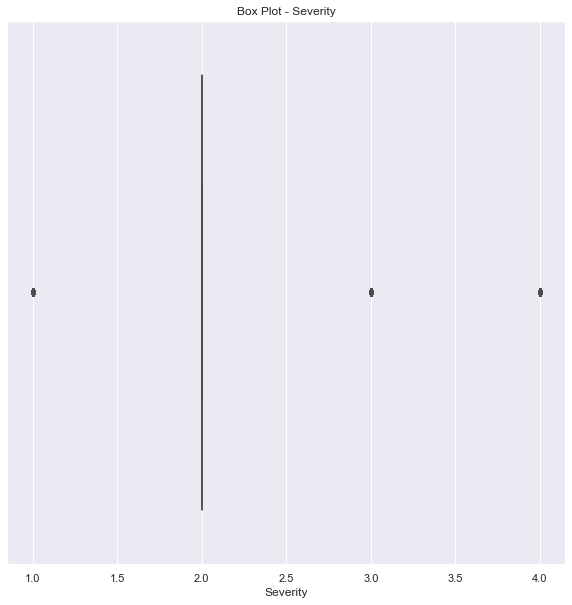

In [26]:
sns.boxplot(x=accidentes['Severity'])
plt.title("Box Plot - {}".format("Severity"))

Text(0.5, 1.0, 'Box Plot - Distance(mi)')

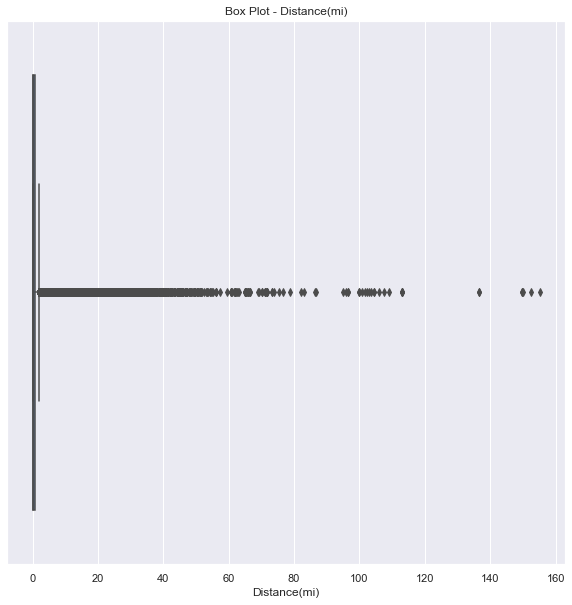

In [27]:
sns.boxplot(x=accidentes['Distance(mi)'])
plt.title("Box Plot - {}".format("Distance(mi)"))

Text(0.5, 1.0, 'Box Plot - Pressure(in)')

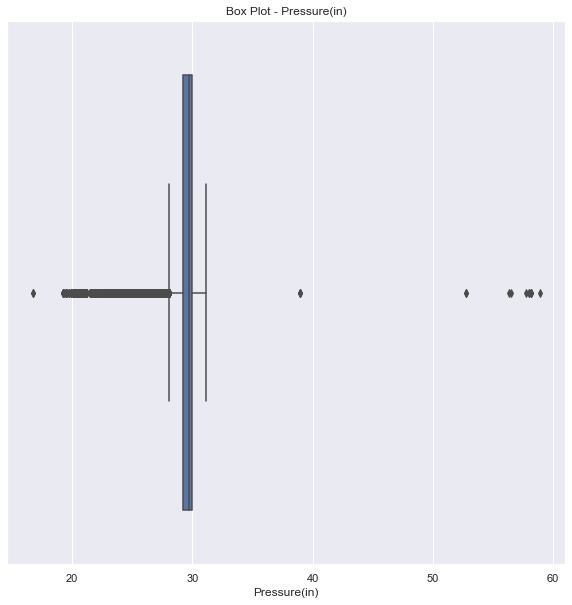

In [28]:
sns.boxplot(x=accidentes['Pressure(in)'])
plt.title("Box Plot - {}".format("Pressure(in)"))

Text(0.5, 1.0, 'Box Plot - Visibility(mi)')

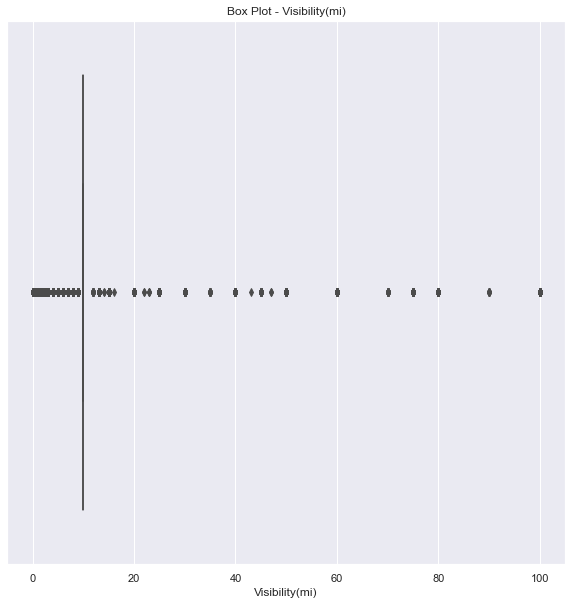

In [29]:
sns.boxplot(x=accidentes['Visibility(mi)'])
plt.title("Box Plot - {}".format("Visibility(mi)"))

In [30]:
accidentes.to_csv("accidentes.2.limpio_analisis.csv", index=False)